In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [90]:
def give_recommendations(index,restaurants, cos_sim_data, print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  recos = []
  for i in index_recomm:
    print(restaurants.iloc[i]['url'])
    recos.append(restaurants.iloc[i]['url'])
  return recos

In [91]:
# find similarities between restaurants
def generate_similarities(restaurants):
    X = np.array(restaurants.iloc[0:, 1:])
    cos_sim_data = pd.DataFrame(cosine_similarity(X))
    return cos_sim_data

In [92]:
# plot the distribution of cosine similairty scores
# why are the scores so concentrated between 0.88 to 0.95? Might come from nature of input data. Keywords frome each topic is almost the same except hte location of restaurants. How do we deal w this?
import seaborn as sns

def plot_similarity_distribution(cos_sim_data):
    sns.distplot(cos_sim_data[0], hist=True, kde=True, 
                bins=int(180/5), color = 'darkblue', 
                hist_kws={'edgecolor':'black'},
                kde_kws={'linewidth': 4}).set(title = 'Cosine Similarity Distribution')
    


In [93]:
def standardise(old_data, url_col_name):
    scaler = MinMaxScaler()
    data = pd.DataFrame()
    data[url_col_name] = old_data[url_col_name]
    data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
    data.columns = old_data.columns
    return data
    

In [94]:
reviewer_reviews_df = pd.read_csv('../cleaning/cleaned_reviewer_reviews.csv', index_col=0).reset_index(drop=True) 
#reviewer_reviews_df = pd.read_csv('scrape/reviewer-data/all_reviewer_reviews.csv', index_col=0).reset_index(drop=True) ###### TO CHANGE FILE PATH TO THE CORRECT ONE
reviewer_reviews_df.head(2)

name  \
0                Kazoku Japanese Cuisine               
1                   Tigerlily Patisserie               

                                             address  \
0                1 Goldhill Plaza, Singapore     ...   
1                350 Joo Chiat Road, Singapore   ...   

                                              review  \
0  \n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...   
1  \nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...   

                                          date  \
0                           4d ago               
1                Feb 26 at 12:44pm               

                                                link    reviewer  keep  \
0  https://www.burpple.com/kazoku-japanese-cuisin...  alamakgirl     1   
1  https://www.burpple.com/tigerlily-patisserie?b...  alamakgirl     1   

                                        cleaned_text  
0  kazoku chirashi s2990 thick slice tuna salmon ...  
1  beehive s15 lemon thyme lychee honey jelly lig...

## Doc2Vec Trigram Recommendation Results

In [95]:
doc2vec = pd.read_csv("../topic_modelling/doc2vec_labelled_restaurants_model3.csv").iloc[:,2:]
doc2vec

url  cleaned_price  \
0    https://www.burpple.com/108-matcha-saro?bp_ref...           10.0   
1    https://www.burpple.com/136-hong-kong-street-f...           15.0   
2    https://www.burpple.com/15-stamford?bp_ref=%2F...           60.0   
3    https://www.burpple.com/25-degrees-singapore?b...           20.0   
4    https://www.burpple.com/46-mittsu?bp_ref=%2Ff%...           15.0   
..                                                 ...            ...   
840  https://www.burpple.com/yun-nans?bp_ref=%2Ff%2...           20.0   
841  https://www.burpple.com/zafferano?bp_ref=%2Ff%...          100.0   
842  https://www.burpple.com/zai-shun-curry-fish-he...           15.0   
843  https://www.burpple.com/zazz-pizza?bp_ref=%2Ff...           20.0   
844  https://www.burpple.com/zoeys-diner?bp_ref=%2F...           15.0   

     Date Night  Buffets  Novel  Sustainable  Good Environment  BBQ  Alcohol  \
0             0        0      0            0                 0    0        0   
1             0        0      0            0                 0    0        0   
2             1        0      0            0                 0    0        0   
3             0        0      0            0                 0    0        0   
4             0        0      0            0                 0    0        0   
..          ...      ...    ...          ...               ...  ...      ...   
840           0        0      0            0                 0    0        0   
841           1        0      0            0                 1    0        0   
842           0        0      1            0                 0    0        0   
843           0        0      0            0                 0    0        0   
844           0        0      0            0                 0    0        0   

     Rainy Day Comforts  ...  Thomson  Tiong Bahru  Toa Payoh  \
0                     0  ...        0            0          0   
1                     1  ...        0            0          0   
2                     0  ...        0            0          0   
3                     0  ...        0            0          0   
4                     0  ...        0            0          0   
..                  ...  ...      ...          ...        ...   
840                   0  ...        0            0          0   
841                   0  ...        0            0          0   
842                   0  ...        0            0          0   
843                   0  ...        0            0          0   
844                   0  ...        0            0          0   

     Upper Bukit Timah  Upper East Coast Road  West Coast  Yishun  0  1  2  
0                    0                      0           0       0  0  1  0  
1                    0                      0           0       0  0  1  0  
2                    0                      0           0       0  0  1  0  
3                    0                      0           0       0  0  1  0  
4                    0                      0           0       0  0  1  0  
..                 ...                    ...         ...     ... .. .. ..  
840                  0                      0           0       0  0  1  0  
841                  0                      0           0       0  0  1  0  
842                  0                      0           0       0  0  1  0  
843                  0                      0           0       0  0  1  0  
844                  0                      0           0       0  0  1  0  

[845 rows x 128 columns]

In [96]:
doc2vec = standardise(doc2vec, 'url')

/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_5823/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_5823/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cleaned_price', ylabel='Density'>

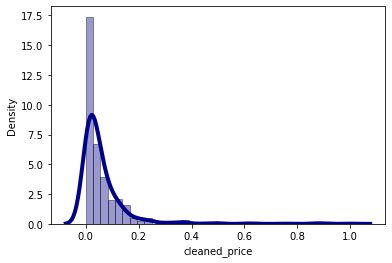

In [97]:
sns.distplot(doc2vec['cleaned_price'], hist=True, kde=True, 
    bins=int(180/5), color = 'darkblue', 
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 4})

In [98]:
cos_sim_data = generate_similarities(doc2vec)

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


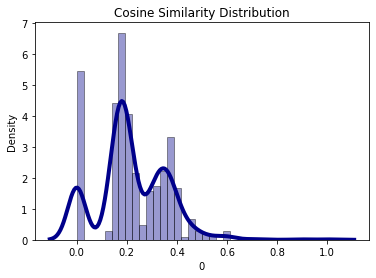

In [99]:
plot_similarity_distribution(cos_sim_data)

In [100]:
cos_sim_data

0         1         2         3         4         5         6    \
0    1.000000  0.169075  0.169092  0.182637  0.338095  0.200064  0.365143   
1    0.169075  1.000000  0.285809  0.154426  0.142936  0.169161  0.308593   
2    0.169092  0.285809  1.000000  0.463029  0.428462  0.507211  0.462270   
3    0.182637  0.154426  0.463029  1.000000  0.462982  0.547841  0.333293   
4    0.338095  0.142936  0.428462  0.462982  1.000000  0.507159  0.462889   
..        ...       ...       ...       ...       ...       ...       ...   
840  0.200064  0.507159  0.169665  0.182789  0.169161  0.200231  0.182548   
841  0.149044  0.126344  0.505847  0.543764  0.377503  0.595649  0.271295   
842  0.141460  0.478131  0.358482  0.129204  0.119590  0.141532  0.258191   
843  0.182637  0.154426  0.463029  0.500120  0.462982  0.730367  0.333293   
844  0.169075  0.142936  0.285809  0.308704  0.571468  0.338160  0.308593   

          7         8         9    ...       835       836       837  \
0    0.149044  0.199997  0.399994  ...  0.507084  0.000000  0.200048   
1    0.126344  0.338046  0.338046  ...  0.000000  0.377947  0.507145   
2    0.631258  0.337595  0.506392  ...  0.000000  0.188721  0.338168   
3    0.543764  0.182552  0.365104  ...  0.154285  0.000000  0.365257   
4    0.377503  0.169023  0.338046  ...  0.000000  0.000000  0.338133   
..        ...       ...       ...  ...       ...       ...       ...   
840  0.149930  0.199971  0.199971  ...  0.000000  0.223575  0.400109   
841  0.668795  0.148594  0.297189  ...  0.125585  0.000000  0.298075   
842  0.210777  0.565667  0.282834  ...  0.239038  0.158109  0.424314   
843  0.408133  0.182552  0.365104  ...  0.000000  0.000000  0.365257   
844  0.251924  0.169023  0.169023  ...  0.000000  0.000000  0.169121   

          838       839       840       841       842       843       844  
0    0.200064  0.200064  0.200064  0.149044  0.141460  0.182637  0.169075  
1    0.338160  0.338160  0.507159  0.126344  0.478131  0.154426  0.142936  
2    0.169665  0.169665  0.169665  0.505847  0.358482  0.463029  0.285809  
3    0.182789  0.182789  0.182789  0.543764  0.129204  0.500120  0.308704  
4    0.169161  0.169161  0.169161  0.377503  0.119590  0.462982  0.571468  
..        ...       ...       ...       ...       ...       ...       ...  
840  0.600115  0.600115  1.000000  0.149930  0.282929  0.182789  0.338160  
841  0.149930  0.149930  0.149930  1.000000  0.105709  0.815026  0.251924  
842  0.565722  0.282929  0.282929  0.105709  1.000000  0.129204  0.119590  
843  0.182789  0.182789  0.182789  0.815026  0.129204  1.000000  0.308704  
844  0.338160  0.507159  0.338160  0.251924  0.119590  0.308704  1.000000  

[845 rows x 845 columns]

In [101]:
recommendation_list = []
for idx, row in reviewer_reviews_df.iterrows():
    url = row['link']
    i = list(doc2vec['url']).index(url)
    recos = give_recommendations(i, doc2vec, cos_sim_data)
    recommendation_list.append(recos)

https://www.burpple.com/chengdusg?bp_ref=%2Ff%2FvNdWq9eF
https://www.burpple.com/douraku-sushi-park-regis-singapore?bp_ref=%2Ff%2FeBbf61iz
https://www.burpple.com/koh-grill-sushi-bar?bp_ref=%2Ff%2FZlJD45Z0
https://www.burpple.com/menbakasg?bp_ref=%2Ff%2F8Frg0TFc
https://www.burpple.com/shin-minori-japanese-restaurant?bp_ref=%2F%40destiny2309%2Ftimeline
https://www.burpple.com/petit-pain?bp_ref=%2Ff%2Fm-D7Zzj8
https://www.burpple.com/rrooll?bp_ref=%2Ff%2FSM5mOcAH
https://www.burpple.com/simple-cafe?bp_ref=%2Ff%2FkpyvyUbA
https://www.burpple.com/patisserie-cle?bp_ref=%2Ff%2FyzqIFo8a
https://www.burpple.com/lavender-jewel-changi-airport?bp_ref=%2Ff%2F5lfhD1Qd
https://www.burpple.com/old-world-bakuteh?bp_ref=%2Ff%2Fi7d7uAzg
https://www.burpple.com/sembawang-traditional-claypot-rice-bao?bp_ref=%2Ff%2FFN1KxTcx
https://www.burpple.com/swenson-yishun?bp_ref=%2Ff%2FdMO1bcg9
https://www.burpple.com/yishun-park-hawker-centre?bp_ref=%2Ff%2FIpn1LEkX
https://www.burpple.com/peony-jade-keppel-club?bp

In [61]:
reviewer_reviews_df['recommendations'] = recommendation_list
reviewer_reviews_df.head(5)

name  \
0                Kazoku Japanese Cuisine               
1                   Tigerlily Patisserie               
2                Putien (Northpoint City)        ...   
3                Our Tampines Hub Hawker Centre (...   
4                Hokkaido Ramen Santouka (Clarke ...   

                                             address  \
0                1 Goldhill Plaza, Singapore     ...   
1                350 Joo Chiat Road, Singapore   ...   
2                930 Yishun Avenue 2, Singapore  ...   
3                1 Tampines Walk, Singapore      ...   
4                6 Eu Tong Sen Street, Singapore ...   

                                              review  \
0  \n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...   
1  \nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...   
2  \nBirthday Treat \n20% discount \nValid during...   
3  \nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...   
4  \nBirthday Treat\n50% off Tokusen Toroniku Ram...   

                                          date  \
0                           4d ago               
1                Feb 26 at 12:44pm               
2                Feb 24 at 10:47pm               
3                 Feb 24 at 8:33am               
4                Feb 19 at 12:27pm               

                                                link    reviewer  keep  \
0  https://www.burpple.com/kazoku-japanese-cuisin...  alamakgirl     1   
1  https://www.burpple.com/tigerlily-patisserie?b...  alamakgirl     1   
2  https://www.burpple.com/putien-8?bp_ref=%2Ff%2...  alamakgirl     1   
3  https://www.burpple.com/our-tampines-hub?bp_re...  alamakgirl     1   
4  https://www.burpple.com/hokkaido-ramen-santouk...  alamakgirl     1   

                                        cleaned_text  \
0  kazoku chirashi s2990 thick slice tuna salmon ...   
1  beehive s15 lemon thyme lychee honey jelly lig...   
2  20 discount valid birthday month member starte...   
3  set c s250 co friday s250 cashback pay paylah ...   
4  50 tokusen toroniku ramen s23 s1150 need redee...   

                                     recommendations  
0  [https://www.burpple.com/chengdusg?bp_ref=%2Ff...  
1  [https://www.burpple.com/petit-pain?bp_ref=%2F...  
2  [https://www.burpple.com/old-world-bakuteh?bp_...  
3  [https://www.burpple.com/tampines-round-market...  
4  [https://www.burpple.com/sanpoutei-ramen-1?bp_...

In [62]:
reviewer_reviews_df.to_csv('doc2vec_content_recommendation.csv')

## LDA Recommendation Results

In [109]:
lda = pd.read_csv("../topic_modelling/lda_labelled_restaurants_5.csv", index_col = 0).iloc[:,1:]

In [110]:
lda = standardise(lda, 'url')

/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_5823/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5wj2k6hwrc_yc0000gn/T/ipykernel_5823/3381840846.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[old_data.drop(url_col_name,axis = 1).columns] = pd.DataFrame(scaler.fit_transform(old_data.drop(url_col_name, axis =1)))
/var/folders/74/n55gd6gs38n5

In [111]:
cos_sim_data = generate_similarities(lda)

/Users/sabrina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


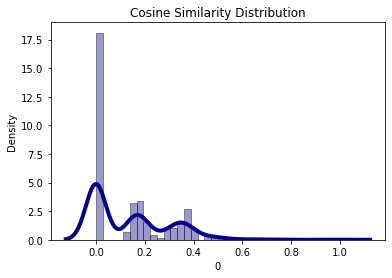

In [112]:
plot_similarity_distribution(cos_sim_data)

In [113]:
give_recommendations(i, lda, cos_sim_data)

https://www.burpple.com/paradise-dynasty-10?bp_ref=%2Ff%2F0OyZvlUS
https://www.burpple.com/tim-ho-wan-13?bp_ref=%2Ff%2FkDJDghMt
https://www.burpple.com/xiao-yao-ge?bp_ref=%2Ff%2FBdAHhs8_
https://www.burpple.com/yun-nans-2?bp_ref=%2Ff%2Fy14zR297
https://www.burpple.com/zai-shun-curry-fish-head-seafood?bp_ref=%2Ff%2FguifIwH4


['https://www.burpple.com/paradise-dynasty-10?bp_ref=%2Ff%2F0OyZvlUS',
 'https://www.burpple.com/tim-ho-wan-13?bp_ref=%2Ff%2FkDJDghMt',
 'https://www.burpple.com/xiao-yao-ge?bp_ref=%2Ff%2FBdAHhs8_',
 'https://www.burpple.com/yun-nans-2?bp_ref=%2Ff%2Fy14zR297',
 'https://www.burpple.com/zai-shun-curry-fish-head-seafood?bp_ref=%2Ff%2FguifIwH4']

In [114]:
recommendation_list = []
for idx, row in reviewer_reviews_df.iterrows():
    url = row['link']
    i = list(doc2vec['url']).index(url)
    recos = give_recommendations(i, lda, cos_sim_data)
    recommendation_list.append(recos)

https://www.burpple.com/shin-minori-japanese-restaurant?bp_ref=%2F%40destiny2309%2Ftimeline
https://www.burpple.com/uminamisg?bp_ref=%2Ff%2FQk7vUeQl
https://www.burpple.com/nomiya?bp_ref=%2Ff%2FEsf2WAVe
https://www.burpple.com/saketoshi?bp_ref=%2Ff%2FhGutKP9y
https://www.burpple.com/shukuu-izakaya?bp_ref=%2F%40geniceooi%2Ftimeline
https://www.burpple.com/petit-pain?bp_ref=%2Ff%2Fm-D7Zzj8
https://www.burpple.com/fatcat-ice-cream-bar?bp_ref=%2F%40misjo3y%2Ftimeline
https://www.burpple.com/patisserie-cle?bp_ref=%2Ff%2FyzqIFo8a
https://www.burpple.com/rrooll?bp_ref=%2Ff%2FSM5mOcAH
https://www.burpple.com/simple-cafe?bp_ref=%2Ff%2FkpyvyUbA
https://www.burpple.com/old-world-bakuteh?bp_ref=%2Ff%2Fi7d7uAzg
https://www.burpple.com/sembawang-traditional-claypot-rice-bao?bp_ref=%2Ff%2FFN1KxTcx
https://www.burpple.com/yishun-park-hawker-centre?bp_ref=%2Ff%2FIpn1LEkX
https://www.burpple.com/chui-huay-lim-teochew-cuisine?bp_ref=%2Ff%2FCLgLGVP9
https://www.burpple.com/xi-yan-shaw?bp_ref=%2Ff%2Fu2Ocfw

In [115]:
reviewer_reviews_df['recommendations'] = recommendation_list
reviewer_reviews_df.head(5)

name  \
0                Kazoku Japanese Cuisine               
1                   Tigerlily Patisserie               
2                Putien (Northpoint City)        ...   
3                Our Tampines Hub Hawker Centre (...   
4                Hokkaido Ramen Santouka (Clarke ...   

                                             address  \
0                1 Goldhill Plaza, Singapore     ...   
1                350 Joo Chiat Road, Singapore   ...   
2                930 Yishun Avenue 2, Singapore  ...   
3                1 Tampines Walk, Singapore      ...   
4                6 Eu Tong Sen Street, Singapore ...   

                                              review  \
0  \n1-for-1 Don\nKazoku Chirashi Don (S$29.90++)...   
1  \nBrunch\nBeehive (S$15+)\nLemon, thyme and ly...   
2  \nBirthday Treat \n20% discount \nValid during...   
3  \nSet C\nSet C (S$2.50)\n‘Cos it’s Friday \nGo...   
4  \nBirthday Treat\n50% off Tokusen Toroniku Ram...   

                                          date  \
0                           4d ago               
1                Feb 26 at 12:44pm               
2                Feb 24 at 10:47pm               
3                 Feb 24 at 8:33am               
4                Feb 19 at 12:27pm               

                                                link    reviewer  keep  \
0  https://www.burpple.com/kazoku-japanese-cuisin...  alamakgirl     1   
1  https://www.burpple.com/tigerlily-patisserie?b...  alamakgirl     1   
2  https://www.burpple.com/putien-8?bp_ref=%2Ff%2...  alamakgirl     1   
3  https://www.burpple.com/our-tampines-hub?bp_re...  alamakgirl     1   
4  https://www.burpple.com/hokkaido-ramen-santouk...  alamakgirl     1   

                                        cleaned_text  \
0  kazoku chirashi s2990 thick slice tuna salmon ...   
1  beehive s15 lemon thyme lychee honey jelly lig...   
2  20 discount valid birthday month member starte...   
3  set c s250 co friday s250 cashback pay paylah ...   
4  50 tokusen toroniku ramen s23 s1150 need redee...   

                                     recommendations  
0  [https://www.burpple.com/shin-minori-japanese-...  
1  [https://www.burpple.com/petit-pain?bp_ref=%2F...  
2  [https://www.burpple.com/old-world-bakuteh?bp_...  
3  [https://www.burpple.com/tampines-round-market...  
4  [https://www.burpple.com/sanpoutei-ramen-1?bp_...

In [116]:
reviewer_reviews_df.to_csv('lda_content_recommendation.csv')